## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here.

In [21]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset.

In [22]:
df.shape[0]

69889

`c)` The proportion of users converted.

In [23]:
df.converted.mean()

0.13047832992316388

`d)` Do any of the rows have missing values?

In [24]:
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [25]:
df['country'].value_counts()

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

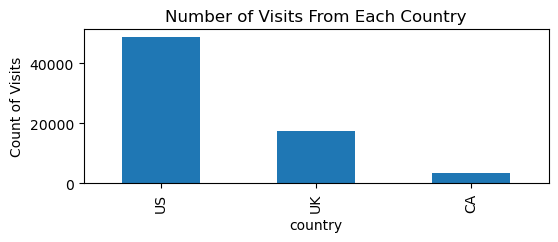

In [26]:
df['country'].value_counts().plot(kind='bar', figsize= (6,2));
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.savefig('countries.png')

plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


As we can see above, **converted** is a numerical column.

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not?

In [28]:
df.converted.value_counts()


converted
0    60770
1     9119
Name: count, dtype: int64

The possible values are `0` and `1`, and it makes sense as the **converted** column is a binary variable.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [29]:
(df['converted'] == 1).mean()

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

The difference between the `treatment` and `control` groups is a positive number, which indicates that the `treatment` is related to higher `converted` rates. **Nevertheless**, to determine that we have evidence that it is the case, we need to conduct a statistical test.

`e)` What is the probability that an individual was in the `treatment`?

In [32]:
df.query('group == "treatment"').shape[0] / df.shape[0]


0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [33]:
df.query('country == "CA"').shape[0] / df.shape[0]


0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?


In [34]:
df.loc[df['country'] == 'US']['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`?

In [35]:
df.loc[df['country'] == 'UK']['converted'].mean()

0.12512107572218106

In [36]:
df.loc[df['country'] == 'CA']['converted'].mean()

0.1252866972477064

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

Seeing the probabilities disseminated by country below, we don't have evidence that `converted` rates differ from one country
to other.

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [37]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [38]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [19]:
# Using the second method
df.groupby(['country', 'group'])['converted'].mean()

country  group    
CA       control      0.094474
         treatment    0.154017
UK       control      0.101649
         treatment    0.148698
US       control      0.107314
         treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK              | CA             |
| ----------- | ----------- | -----------     | -----------    |
| Control     | 10.7%       |  10.2%          |  9.4%          |
| Treatment   | 15.8%       |  14.9%          |  15.4%         |

The values filled above were rounded to **one** decimal.

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page.

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [11]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [41]:
treatment_converted = np.random.binomial(n=1, p=p_control_treatment_null, size=n_treatment)
control_converted = np.random.binomial(n=1, p=p_control_treatment_null, size=n_control)
treatment_converted.mean() - control_converted.mean()

-0.0004232383974180909

In [40]:
#using another method to simulate, this method generalized beyond binomial distribution.
treatment_converted = np.random.choice([1,0], size = n_treatment, p = [p_control_treatment_null, 1- p_control_treatment_null])
control_converted = np.random.choice([1,0], size = n_control, p = [p_control_treatment_null, 1- p_control_treatment_null])
treatment_converted.mean() - control_converted.mean()

0.00036713900341750483

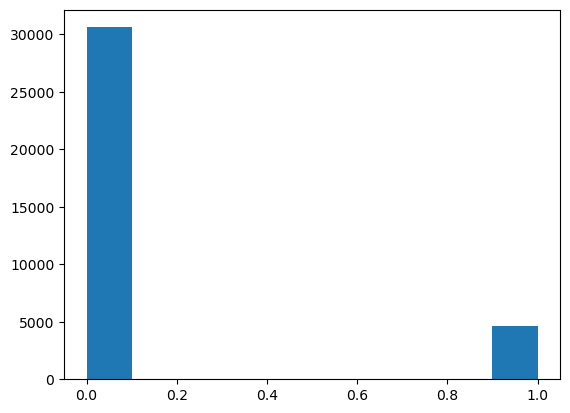

In [42]:
plt.hist(treatment_converted);

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [43]:
control_converted = np.random.binomial(n=1, p=p_control_treatment_null, size=n_control)
#control_converted = np.random.choice([1,0], size = n_control, p = [p_control_treatment_null, 1- p_control_treatment_null])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [44]:
treatment_converted.mean() - control_converted.mean()

0.0007590673872292231

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [45]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.choice([1,0], size = n_treatment,
                                           p = [p_control_treatment_null, 1- p_control_treatment_null])
    control_converted = np.random.choice([1,0], size = n_control,
                                         p = [p_control_treatment_null, 1- p_control_treatment_null])
    # calculate p_treatment and p_control under the null
    p_treatment = treatment_converted.mean()
    p_control = control_converted.mean()

    # calculate the difference between p_treatment_null and p_control_null
    # add p_diff to the p_diffs array.append()
    p_diffs.append(treatment_converted.mean() - control_converted.mean())

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

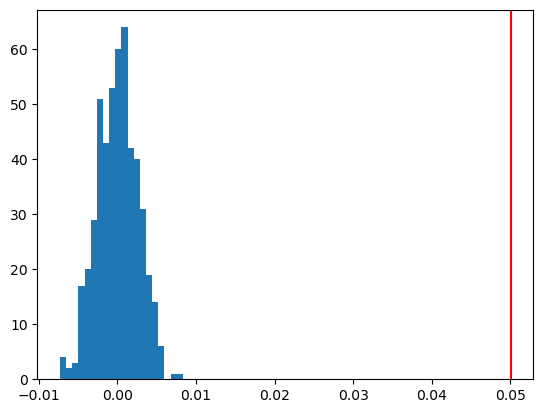

In [46]:
p_popul_diffs = df.loc[df['group'] == 'treatment']['converted'].mean() - df.loc[df['group'] == 'control']['converted'].mean()

p_diffs = pd.Series(p_diffs)
plt.hist(p_diffs, bins=20);
plt.axvline(p_popul_diffs, color = 'r');

In the answer of the question `d)` of **Part II**, I noticed that the difference in `convert rates` between `treatment` and `control` groups, however small, could indicate that the `treatment` is related to higher converted rates, so I expected that many values of the distribution of the differences, the sampling distribution, would be higher than zero.

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [49]:
(p_diffs > p_popul_diffs).mean()

0.0

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

I compute above the probability of obtaining the observed statistic, **p_poup_diff** here, or more extreme in favor of the alternative hypothesis, given that the null is true. This calculated probability is called the **P-Value**. Since this value is less than Type I error threshold of 0.05, we reject the null Hypothesis, that is, the treatment group is actually related to higher converted rates. Moreover, If we look at the histogram above, we can easily see that the observed statistic, the average difference of about 0.05, is located far away from the null distribution, which means that the null hypothesis is unlikely to generate our statistic.

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regresion**.

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): 

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [37]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


In [97]:
pd.get_dummies(df['group'])


,control,treatment
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
69884,0,1
69885,1,0
69886,0,1
69887,1,0


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. 

In [38]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

In [39]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [40]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                0.007175
Time:                        01:32:11   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

The p-value associated with **ab_page** is `0.0`, which leads to the same conclusion drawn in the **Experiment** section, that the we reject the null hypothesis.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [98]:
### Create the necessary dummy variables
df['US'] = pd.get_dummies(df['country'])['US']
df['UK'] = pd.get_dummies(df['country'])['UK']
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [99]:
X = df[['intercept', 'US', 'UK']]
y = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`.

In [100]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.387241
         Iterations 6


`d)` Provide the summary of your model below.

In [101]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69886
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:               0.0001402
Time:                        03:51:55   Log-Likelihood:                -27064.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                   0.02250
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9433      0.051    -37.994      0.000      -2.044      -1.843
US             0.0666      0.053      1.261      0.207      -0.037       0.170
UK            -0.0015      0.056     -0.027      0.9

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

The both p-values of `US` and `UK` suggest that there is no difference in `convert` rates between these countries, since the p-values are higher than 0.05.